In [1]:
print('Python current version: ')
!python --version

Python current version: 
Python 3.10.12


In [2]:
from google.colab import drive, runtime

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


## Constants

Defines all constants used in the code

In [4]:
# Paths
DRIVE_DIR = '/content/drive/MyDrive'
PROJECT_ROOT_DIR = f'{DRIVE_DIR}/src'
DATA_DIR = f'{PROJECT_ROOT_DIR}/data'
LOG_DIR = f'{PROJECT_ROOT_DIR}/logs'
MODELS_DIR = f'{PROJECT_ROOT_DIR}/models'
PREDICTIONS_DIR = f'{PROJECT_ROOT_DIR}/predictions'
HYPERPARAMS_DIR = f'{PROJECT_ROOT_DIR}/hyperparams'
MODULES_DIR = f'{PROJECT_ROOT_DIR}/modules'
IMG_DIR = f'{DATA_DIR}/images'

IMG_SIZE = 224
FULL_COLUMN_LABELS = {
    "MEL": "Melanoma",
    "NV": "Melanocytic nevus",
    "BCC": "Basal cell carcinoma",
    "AK": "Actinic keratosis",
    "BKL": "Benign keratosis",
    "DF": "Dermatofibroma",
    "VASC": "Vascular lesion",
    "SCC": "Squamous cell carcinoma",
    "UNK": "None of the others"
  }

## Understanding the data

In this section, the data used will be visualized for better understanding

In [5]:
import pandas as pd
print(f'Pandas Version: {pd.__version__}')

Pandas Version: 2.1.4


In [6]:
isic_original_data = pd.read_csv(f'{DATA_DIR}/ISIC_2019_Training_GroundTruth.csv')
isic_subsample_data = pd.read_csv(f'{DATA_DIR}/ISIC_2019_subsample.csv')

In [7]:
isic_original_data.head(3)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
isic_subsample_data.head(3)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0062914,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0069300,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0014059_downsampled,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
isic_original_data.describe()

,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
count,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.0
mean,0.178516,0.508270,0.131183,0.034227,0.103588,0.009435,0.009988,0.024792,0.0
std,0.382954,0.499941,0.337607,0.181815,0.304732,0.096677,0.099440,0.155493,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [10]:
isic_subsample_data.describe()

,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.0
mean,0.500000,0.093889,0.093889,0.093889,0.093889,0.026556,0.028111,0.069778,0.0
std,0.500028,0.291690,0.291690,0.291690,0.291690,0.160789,0.165299,0.254786,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [11]:
print(f'ISIC original dataframe shape: {isic_original_data.shape}')
print(f'ISIC subsample dataframe shape: {isic_subsample_data.shape}')

ISIC original dataframe shape: (25331, 10)
ISIC subsample dataframe shape: (9000, 10)


In [12]:
(((isic_original_data.iloc[:, 1:].rename(columns=FULL_COLUMN_LABELS)) == 1.0).sum())

,0
Melanoma,4522
Melanocytic nevus,12875
Basal cell carcinoma,3323
Actinic keratosis,867
Benign keratosis,2624
Dermatofibroma,239
Vascular lesion,253
Squamous cell carcinoma,628
None of the others,0


In [13]:
(((isic_subsample_data.iloc[:, 1:].rename(columns=FULL_COLUMN_LABELS)) == 1.0).sum())

,0
Melanoma,4500
Melanocytic nevus,845
Basal cell carcinoma,845
Actinic keratosis,845
Benign keratosis,845
Dermatofibroma,239
Vascular lesion,253
Squamous cell carcinoma,628
None of the others,0


In [14]:
df_original = isic_original_data[['image', 'MEL']].copy().rename(columns={'MEL': 'label'})
df_subsample = isic_subsample_data[['image', 'MEL']].copy().rename(columns={'MEL': 'label'})

In [15]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   25331 non-null  object 
 1   label   25331 non-null  float64
dtypes: float64(1), object(1)
memory usage: 395.9+ KB


In [16]:
df_subsample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   9000 non-null   object 
 1   label   9000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.8+ KB


In [17]:
df_original.describe()

,label
count,25331.000000
mean,0.178516
std,0.382954
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [18]:
df_subsample.describe()

,label
count,9000.000000
mean,0.500000
std,0.500028
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [19]:
def print_table_sample_info(df, dataset_name):
  melanoma_samples = (((df == 1.0).values).sum())
  non_melanoma_samples = (((df == 0.0).values).sum())
  total_samples = non_melanoma_samples + melanoma_samples

  non_melanoma_samples_percent = (non_melanoma_samples * 100) / total_samples
  melanoma_samples_percent = (melanoma_samples * 100) / total_samples

  amount_samples = {
      1: ['Non-melanoma', non_melanoma_samples, f'{non_melanoma_samples_percent:.2f}%'],
      2: ['Melanoma', melanoma_samples, f'{melanoma_samples_percent:.2f}%']
    }

  print('{:>35}'.format(f'{dataset_name} SAMPLES\n'))

  print("{:<15} {:<15} {:<15}".format('DIAGNOSTIC', 'N_SAMPLES', 'PERCENTAGE_OF_TOTAL'))
  print('-' * 52)

  for key, value in amount_samples.items():
      diagnostic, n_samples, percent_of_total = value
      print("{:<15} {:<15} {:<15}".format(diagnostic, n_samples, percent_of_total))

  print('-' * 52)
  print("{:<15} {:<15} {:<15}\n".format('Total', total_samples, f'{(non_melanoma_samples_percent + melanoma_samples_percent):.2f}%'))

In [20]:
print_table_sample_info(df_original, 'ORIGINAL DATAFRAME')
print_table_sample_info(df_subsample, 'SUBSAMPLE DATAFRAME')

        ORIGINAL DATAFRAME SAMPLES

DIAGNOSTIC      N_SAMPLES       PERCENTAGE_OF_TOTAL
----------------------------------------------------
Non-melanoma    20809           82.15%         
Melanoma        4522            17.85%         
----------------------------------------------------
Total           25331           100.00%        

       SUBSAMPLE DATAFRAME SAMPLES

DIAGNOSTIC      N_SAMPLES       PERCENTAGE_OF_TOTAL
----------------------------------------------------
Non-melanoma    4500            50.00%         
Melanoma        4500            50.00%         
----------------------------------------------------
Total           9000            100.00%        



In [21]:
classes_in_label = df_subsample['label'].unique().tolist()
classes_in_label.sort()
non_melanoma_class, melanoma_class = classes_in_label

print('{:>20}'.format('DATAFRAME LABELS\n'))

print("{:<15} {:<15}".format('Class', 'Value'))
print('-' * 23)
print("{:<15} {:<15}".format('Non-melanoma', non_melanoma_class))
print("{:<15} {:<15}".format('Melanoma', melanoma_class))

   DATAFRAME LABELS

Class           Value          
-----------------------
Non-melanoma    0.0            
Melanoma        1.0            


## Load custom modules

Load utils and helper functions

In [22]:
import sys

# Adding the modules path to sys.path
sys.path.append(MODULES_DIR)

In [23]:
# Importing custom modules
from datetime_helper import get_formatted_datetime as gf_datetime, get_formatted_total_runtime as gft_runtime

## Defining the custom dataset

In [24]:
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms as T, models

import os
from timeit import default_timer as timer
from datetime import timedelta
from tqdm import tqdm

In [25]:
import PIL
print(f'Pillow Version: {PIL.__version__}')

Pillow Version: 10.4.0


In [26]:
print(f'PyTorch version: {torch.__version__}')

PyTorch version: 2.4.1+cu121


In [27]:
class_to_idx = {'non-melanoma': 0, 'melanoma': 1}

In [28]:
def get_dataset_classes(class_obj):
  class_to_idx = class_obj
  idx_to_class = {val: key for key, val in class_obj.items()}
  classes = list(class_to_idx.keys())
  num_classes = len(classes)

  return classes, num_classes, class_to_idx, idx_to_class

**Pytorch ToTensor**
[torchvision.transforms.ToTensor](https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html#torchvision.transforms.ToTensor)

Convert a PIL Image or ndarray to tensor and scale the values accordingly.

Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) or if the numpy.ndarray has dtype = np.uint8

In [29]:
class SkinLesionDataset(Dataset):
    classes, num_classes, class_to_idx, idx_to_class = get_dataset_classes(class_to_idx)

    def __init__(self, dataset_file, img_dir, transform=None) -> None:
        super().__init__()
        self.dataset = pd.read_csv(dataset_file)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self) -> int:
        return len(self.dataset)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, f'{self.dataset.iloc[idx, 0]}.jpg')
        image = Image.open(img_path)
        label = self.dataset.iloc[idx, 1]
        if self.transform:
            image, label = self.transform(image, label)
        return image, label

In [30]:
print(
    f'SkinLesionDataset classes info\n{"-" * 53}',
    '\nnum_classes:      ', SkinLesionDataset.num_classes,
    '\nclasses:          ', SkinLesionDataset.classes,
    '\nclass_to_idx:     ', SkinLesionDataset.class_to_idx,
    '\nidx_to_class:     ', SkinLesionDataset.idx_to_class
)

SkinLesionDataset classes info
----------------------------------------------------- 
num_classes:       2 
classes:           ['non-melanoma', 'melanoma'] 
class_to_idx:      {'non-melanoma': 0, 'melanoma': 1} 
idx_to_class:      {0: 'non-melanoma', 1: 'melanoma'}


In [31]:
transform_augmented = T.Compose([
    T.Resize(size=(IMG_SIZE, IMG_SIZE)),
    T.RandomHorizontalFlip(p=0.5),
    T.RandomRotation(degrees=45),
    T.ToTensor()
])

transform_normal = T.Compose([T.Resize(size=(IMG_SIZE, IMG_SIZE)), T.ToTensor()])

target_transform = torch.tensor

In [32]:
def apply_normal_transform(image, label):
  return transform_normal(image), target_transform(label, dtype=torch.long)

def apply_train_transform(image, label):
  return transform_augmented(image), target_transform(label, dtype=torch.long)

## Create test dataset and prepare train and validate datasets

In [33]:
train_data = f'{DATA_DIR}/transfer_learning_datasets/train_data.csv'
val_data = f'{DATA_DIR}/transfer_learning_datasets/val_data.csv'
test_data = f'{DATA_DIR}/transfer_learning_datasets/test_data.csv'

In [34]:
train_dataset = SkinLesionDataset(train_data, IMG_DIR, apply_train_transform)
val_dataset = SkinLesionDataset(val_data, IMG_DIR, apply_normal_transform)
test_dataset = SkinLesionDataset(test_data, IMG_DIR, apply_normal_transform)

In [35]:
print(f'Train size: {len(train_dataset)}\nValidation size: {len(val_dataset)}\nTest size: {len(test_dataset)}')

Train size: 6300
Validation size: 1350
Test size: 1350


## Defining the classifier architecture

In [36]:
import torch.nn as nn
import torch.nn.functional as F

**Calculating the outputs of the convolutional layer**

- padding = (kernel_size - 1)/2
- output = (input_size - kernel_size + 2*padding)/stride + 1
- pool = if (kernel_size == 2 and stride_length == 2): output / 2

```python
# Ex.: Consider a img with input size of (240 x 240 x 3)
kernel_size = 5
stride_length = 1
pool = (kernel_size = 2, stride_length = 2)
padding = (kernel_size - 1) / 2

padding = (5 - 1) / 2 # 2
conv_output = (224 - 5 + 2 * 2) / 1 + 1 # 224
pool_output = 224 / 2 # 112
```

In [37]:
import numpy as np
print(f'NumPy Version: {np.__version__}')

NumPy Version: 1.26.4


In [38]:
# Load the best hyperparameters found using Random Search
best_params_filename = f'{HYPERPARAMS_DIR}/2024-07-28_08-22-23_best_params.npy'
best_params_loaded = np.load(best_params_filename, allow_pickle=True).item()

print(best_params_loaded)

{'optimizer__lr': 0.0001, 'module__fc3_neurons': 512, 'module__fc2_neurons': 512, 'module__fc1_neurons': 128, 'module__dropout': 0.3, 'module__conv4_kernel_size': 5, 'module__conv4_feature_maps': 64, 'module__conv3_kernel_size': 5, 'module__conv3_feature_maps': 64, 'module__conv2_kernel_size': 5, 'module__conv2_feature_maps': 256, 'module__conv1_kernel_size': 3, 'module__conv1_feature_maps': 128, 'max_epochs': 50, 'batch_size': 64}


## Training the classifier ensemble

In [39]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix as confusion_matrix_score,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    precision_recall_curve
)

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
import multiprocessing as mp
print(f'Multiprocessing CPU count: {mp.cpu_count()}')

Multiprocessing CPU count: 8


In [42]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

if device.type == 'cuda':
  device_count = torch.cuda.device_count()
  gpu_name = torch.cuda.get_device_name(0)
  print(f"Using {gpu_name} GPU with {device_count} available devic{'es' if device_count > 1 else 'e'}.")
else:
    print("GPU is not available, using CPU instead")

Using Tesla T4 GPU with 1 available device.


In [43]:
def create_dataloader(dataset, batch_size, shuffle, device, dataloader_name):
  loader_kwargs = {'batch_size': batch_size, 'shuffle': shuffle}
  if device.type == 'cuda':
    loader_kwargs = {**loader_kwargs, 'num_workers': mp.cpu_count(), 'pin_memory': True}

  dataloader = DataLoader(dataset, **loader_kwargs)
  print(f'{dataloader_name} dataloader settings:', loader_kwargs)
  return dataloader

In [44]:
import torch.optim as optim
from copy import deepcopy

In [45]:
num_epochs = best_params_loaded['max_epochs']
batch_size = best_params_loaded['batch_size']
learning_rate = best_params_loaded['optimizer__lr']

print(f'{num_epochs=}, {batch_size=}, {learning_rate=}')

num_epochs=50, batch_size=64, learning_rate=0.0001


In [46]:
train_loader = create_dataloader(train_dataset, batch_size=batch_size, shuffle=True, device=device, dataloader_name='Train')
val_loader = create_dataloader(val_dataset, batch_size=batch_size, shuffle=False, device=device, dataloader_name='Validation')
test_loader = create_dataloader(test_dataset, batch_size=batch_size, shuffle=False, device=device, dataloader_name='Test')

Train dataloader settings: {'batch_size': 64, 'shuffle': True, 'num_workers': 8, 'pin_memory': True}
Validation dataloader settings: {'batch_size': 64, 'shuffle': False, 'num_workers': 8, 'pin_memory': True}
Test dataloader settings: {'batch_size': 64, 'shuffle': False, 'num_workers': 8, 'pin_memory': True}


In [47]:
import gc

def clear_gpu_memory():
  gc.collect()
  torch.cuda.empty_cache()

In [48]:
def train_and_validate(model, criterion, optimizer, train_loader, val_loader):
  date_start = timer()

  logs = []
  loss_history = []
  best_metrics = []
  best_score = 0.0
  best_model = None

  # Movendo o modelo para o device configurado
  model.to(device)

  # Mixed Precision Training
  scaler = torch.cuda.amp.GradScaler()

  #for epoch in tqdm(range(num_epochs)):
  for epoch in range(num_epochs):
    print(f'Epoch [{epoch+1}/{num_epochs}] is starting')

    # Configurando o modelo para o modo de treinamento
    model.train()

    # Inicia o acumulador de perda de treino
    train_loss = 0.0

    # Carregando os dados dos batches
    for train_batch, (images, labels) in enumerate(train_loader):

      # Movendo os tensores para o device configurado
      images = images.to(device)
      labels = labels.to(device)

      # Limpa os gradientes
      optimizer.zero_grad()

      # Context manager that allow regions to run in mixed precision
      with torch.cuda.amp.autocast():
        # Forward propagation
        outputs = model(images)

        # Calcular erro das saidas no forward pass
        loss = criterion(outputs, labels)

      # Realiza o backpropagation do erro para treinar os coeficientes da rede
      scaler.scale(loss).backward()

      # Atualizar os parâmetros do otimizador
      scaler.step(optimizer)
      scaler.update()

      # Adiciona o erro das saídas ao acumulador de erro de treino
      train_loss += loss.item() * images.size(0)

      if (train_batch % 11) == 10:
        print(f'\tTraining batch [{train_batch + 1}/{len(train_loader)}], current batch average loss: {loss.item()}')

    # Verifica a perda de validação e a acurácia na validação
    with torch.no_grad():
      # Configurando o modelo para o modo de avaliação
      model.eval()

      val_loss = 0.0
      val_predicted = []
      val_labels = []

      # Carregando os dados dos batches
      for val_batch, (images, labels) in enumerate(val_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward propagation
        outputs = model(images)

        # Calcular erro das saidas no forward pass
        loss = criterion(outputs, labels)

        # Adiciona o erro das saídas ao acumulador de erro de validação
        val_loss += loss.item() * images.size(0)

        # Calcula as predições
        predicted = torch.argmax(F.softmax(outputs, dim=1), dim=1)

        val_predicted.extend(predicted.cpu().numpy())
        val_labels.extend(labels.cpu().numpy())

        if (val_batch % 11) == 10:
          print(f'\tValidation batch [{val_batch + 1}/{len(val_loader)}], current batch average loss: {loss.item()}')

        clear_gpu_memory()

    # Calcula os erros médios de treino e validação
    average_train_loss = train_loss / len(train_loader.dataset)
    average_val_loss = val_loss / len(val_loader.dataset)

    loss_history.append([average_train_loss, average_val_loss])

    accuracy = accuracy_score(val_labels, val_predicted)
    precision = precision_score(val_labels, val_predicted)
    recall = recall_score(val_labels, val_predicted)
    f1score = f1_score(val_labels, val_predicted)

    epoch_log = f'Epoch [{epoch+1}/{num_epochs}] is done!\n\tLosses | Training average loss: {average_train_loss:.4f}, Validation average loss: {average_val_loss:.4f}\n\tMetrics | Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1score:.4f}'

    logs.append(epoch_log)
    print(f'{epoch_log}\n')

    # Verifica se a pontuação F1 na validação desse modelo nessa época é a melhor
    # Se for a melhor, salva no melhor modelo e na melhor pontuação
    if f1score > best_score:
      best_score = f1score
      best_model = deepcopy(model.state_dict())
      best_metrics = [accuracy, precision, recall, f1score]

  date_end = timer()
  total_runtime = date_end - date_start

  print(f'\nBest metrics found: Accuracy: {best_metrics[0]:.4f}, Precision: {best_metrics[1]:.4f}, Recall: {best_metrics[2]:.4f}, F1 Score: {best_metrics[3]:.4f}\n')
  print(f'Total train and validate runtime: {gft_runtime(date_start, date_end)}\n')

  return best_model, best_metrics, loss_history, logs, total_runtime

In [49]:
def create_train_val_output_log(model_name, best_metrics, logs, time):
  title_log = f'{model_name} model training and validation logs\n'
  history_log = '\n{}\n'.format('\n'.join(logs))
  best_score_log = f'\nBest metrics found: Accuracy: {best_metrics[0]:.4f}, Precision: {best_metrics[1]:.4f}, Recall: {best_metrics[2]:.4f}, F1 Score: {best_metrics[3]:.4f}\n'
  time_log = f'\nTotal train and validate runtime: {str(timedelta(seconds=(time)))}\n'

  return title_log + history_log + best_score_log + time_log


In [50]:
def evaluate_transfer_learning(model, data_loader):
  date_start = timer()

  model.eval()
  all_probabilities = []
  all_predictions = []

  with torch.no_grad():
    for inputs, _ in data_loader:
      inputs = inputs.to(device)
      outputs = model(inputs)
      probabilities = F.softmax(outputs, dim=1)
      predictions = torch.argmax(probabilities, dim=1)

      all_probabilities.extend(probabilities.cpu().numpy())
      all_predictions.extend(predictions.cpu().numpy())

  all_probabilities = np.array(all_probabilities)
  all_predictions = np.array(all_predictions)

  date_end = timer()
  print(f'The shape of all probabilities is: {all_probabilities.shape}')
  print(f'Total predict runtime: {gft_runtime(date_start, date_end)}\n')

  return all_probabilities, all_predictions

In [51]:
def get_metrics(ground_truth, predictions):
  accuracy = accuracy_score(ground_truth, predictions)
  precision = precision_score(ground_truth, predictions)
  recall = recall_score(ground_truth, predictions)
  f1score = f1_score(ground_truth, predictions)

  print(f'Acurácia: {accuracy:.6f} ({(accuracy * 100):.2f}%)')
  print(f'Precisão: {precision:.6f} ({(precision * 100):.2f}%)')
  print(f'Revocação: {recall:.6f} ({(recall * 100):.2f}%)')
  print(f'Pontuação F1: {f1score:.6f} ({(f1score * 100):.2f}%)')
  print('------------------------------------------')
  print('Relatório de Classificação:')
  print(classification_report(ground_truth, predictions, target_names=['non-melanoma', 'melanoma']))

  return accuracy, precision, recall, f1score

In [52]:
import matplotlib.pyplot as plt

In [53]:
def get_precision_recall_curve(ground_truth, predictions):
  precision, recall, _ = precision_recall_curve(ground_truth, predictions)
  plt.plot(recall, precision, lw=2)
  plt.xlabel('Revocação')
  plt.ylabel('Precisão')
  plt.title('Curva Precisão-Revocação')
  plt.show()

In [54]:
def get_roc_auc_curve(ground_truth, predictions):
  fpr, tpr, _ = roc_curve(ground_truth, predictions)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('Taxa de Falsos Positivos')
  plt.ylabel('Taxa de Verdadeiros Positivos')
  plt.title('Curva ROC')
  plt.legend(loc="lower right")
  plt.show()

In [55]:
def get_losses_belong_epochs(losses):
    # Separar as perdas de treino e validação
    train_losses = [epoch[0] for epoch in losses]
    val_losses = [epoch[1] for epoch in losses]

    # Gerar o gráfico
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Perda no Treinamento')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Perda na Validação')

    # Definir os rótulos e o título
    plt.xlabel('Época')
    plt.ylabel('Perda')
    plt.legend()
    plt.title('Perda ao Longo das Épocas')

    # Exibir o gráfico
    plt.show()

In [56]:
test_labels_filename = f'{PREDICTIONS_DIR}/transfer_learning/test_labels.npy'

In [57]:
if not os.path.exists(test_labels_filename):
  test_labels = []

  for _, labels in test_loader:
    test_labels.extend(labels.cpu().numpy())

  test_labels = np.array(test_labels)

  # Salvando test_labels em arquivos
  np.save(test_labels_filename, test_labels)

In [58]:
# Carregando os arquivos
test_labels = np.load(test_labels_filename)

## VGG-16

In [59]:
vgg16 = models.vgg16(pretrained=True)
vgg16

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 207MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [60]:
# Congelar os parametros da rede pré-treinada
for param in vgg16.parameters():
    param.requires_grad = False

In [61]:
# Mudar a última camada para alterar o número de classes
vgg16.classifier[6] = nn.Linear(4096, SkinLesionDataset.num_classes)
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [62]:
criterion_vgg16 = nn.CrossEntropyLoss()
optimizer_vgg16 = optim.Adam(vgg16.parameters(), lr=learning_rate)

In [63]:
print('Starting training and validation of the VGG-16 model\n')

vgg16_best_model, vgg16_best_metrics, vgg16_loss_history, vgg16_logs, vgg16_total_runtime = train_and_validate(vgg16, criterion_vgg16, optimizer_vgg16, train_loader, val_loader)

print('Training and validation of the VGG-16 model has been completed!')
print(f'{"-" * 65}\n')

Starting training and validation of the VGG-16 model

Epoch [1/50] is starting
	Training batch [11/99], current batch average loss: 0.7316741943359375
	Training batch [22/99], current batch average loss: 0.6785907745361328
	Training batch [33/99], current batch average loss: 0.6763019561767578
	Training batch [44/99], current batch average loss: 0.6297483444213867
	Training batch [55/99], current batch average loss: 0.6689300537109375
	Training batch [66/99], current batch average loss: 0.6629142761230469
	Training batch [77/99], current batch average loss: 0.5911436080932617
	Training batch [88/99], current batch average loss: 0.6418838500976562
	Training batch [99/99], current batch average loss: 0.6540309190750122
	Validation batch [11/22], current batch average loss: 0.6478405594825745
	Validation batch [22/22], current batch average loss: 0.59676593542099
Epoch [1/50] is done!
	Losses | Training average loss: 0.6673, Validation average loss: 0.6111
	Metrics | Accuracy: 0.6778, Pre

In [64]:
current_date = gf_datetime(custom_format="%Y-%m-%d_%H-%M-%S", timezone_hours=-3)

In [65]:
vgg16.load_state_dict(vgg16_best_model)
vgg16_state = deepcopy(vgg16.state_dict())

# Save the dict using torch.save()
torch.save(vgg16_state, f'{MODELS_DIR}/{current_date}_vgg16.pth')
print(f'VGG-16 model is saved\n')

VGG-16 model is saved



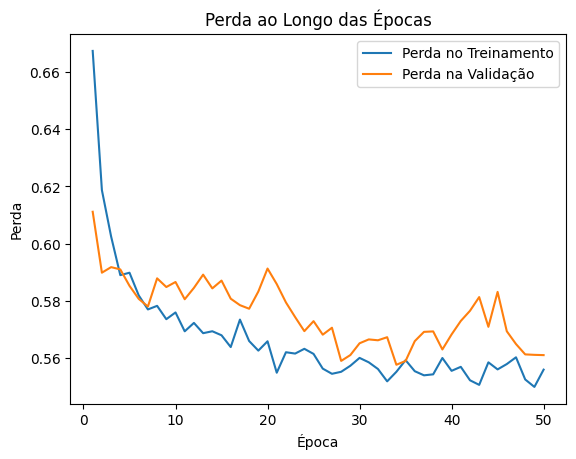

In [66]:
get_losses_belong_epochs(vgg16_loss_history)

In [67]:
with open(f'{LOG_DIR}/{current_date}_vgg16.log', 'w') as vgg16_outputs:
  vgg16_outputs.write(create_train_val_output_log(f'VGG-16', vgg16_best_metrics, vgg16_logs, vgg16_total_runtime))

In [68]:
vgg16_saved_dict = torch.load(f'{MODELS_DIR}/{current_date}_vgg16.pth', map_location=device)
vgg16.load_state_dict(vgg16_saved_dict)
vgg16.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [69]:
vgg16_probabilities, vgg16_predictions = evaluate_transfer_learning(vgg16, test_loader)

The shape of all probabilities is: (1350, 2)
Total predict runtime: 0:03:06.528627



In [70]:
vgg16_predictions_filename = f'{PREDICTIONS_DIR}/transfer_learning/{current_date}_vgg16_predictions.npy'

np.save(vgg16_predictions_filename, vgg16_predictions)

In [71]:
vgg16_predictions = np.load(vgg16_predictions_filename)

In [72]:
print(f'# Obtendo as métricas do VGG-16 no conjunto de teste:\n')
vgg16_accuracy, vgg16_precision, vgg16_recall, vgg16_f1score = get_metrics(test_labels, vgg16_predictions)

# Obtendo as métricas do VGG-16 no conjunto de teste:

Acurácia: 0.703704 (70.37%)
Precisão: 0.689133 (68.91%)
Revocação: 0.742222 (74.22%)
Pontuação F1: 0.714693 (71.47%)
------------------------------------------
Relatório de Classificação:
              precision    recall  f1-score   support

non-melanoma       0.72      0.67      0.69       675
    melanoma       0.69      0.74      0.71       675

    accuracy                           0.70      1350
   macro avg       0.70      0.70      0.70      1350
weighted avg       0.70      0.70      0.70      1350



Matriz de confusão do VGG-16 no conjunto de teste:



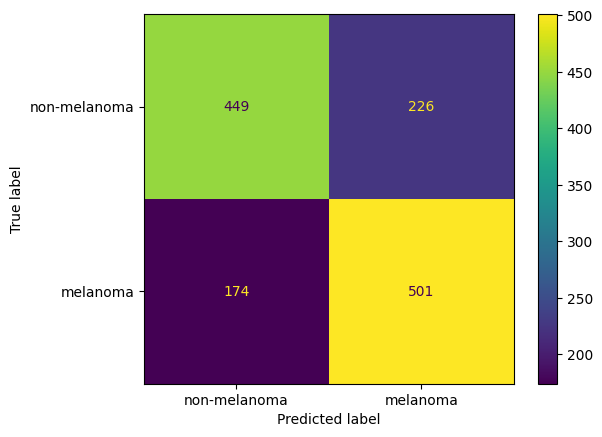

In [73]:
print('Matriz de confusão do VGG-16 no conjunto de teste:\n')
vgg16_confusion_matrix = confusion_matrix_score(test_labels, vgg16_predictions)

vgg16_confusion_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=vgg16_confusion_matrix,
    display_labels=SkinLesionDataset.classes)

vgg16_confusion_matrix_display.plot()

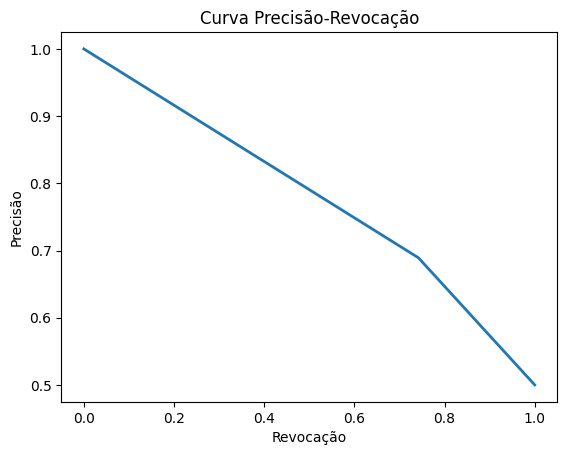

In [74]:
get_precision_recall_curve(test_labels, vgg16_predictions)

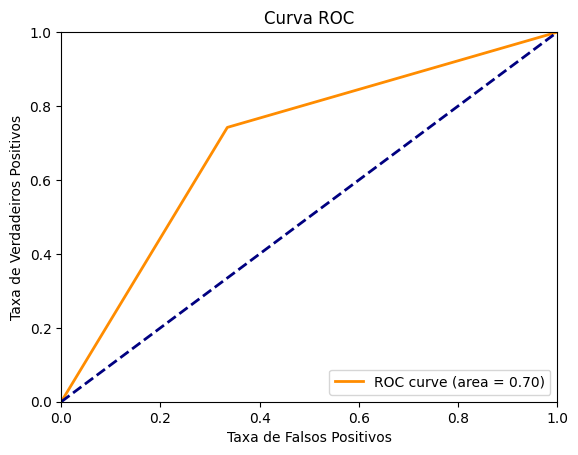

In [75]:
get_roc_auc_curve(test_labels, vgg16_predictions)